In [ ]:
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

%matplotlib inline


In [ ]:
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_data = pd.read_csv("/content/gdrive/My Drive/Assignment2/train_data.csv", header = None)
test_data = pd.read_csv("/content/gdrive/My Drive/Assignment2/test_data.csv", header = None)
train_target = pd.read_csv("/content/gdrive/My Drive/Assignment2/train_target.csv", header = None)
 

In [ ]:
from tensorflow.keras.utils import to_categorical
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()
train_target = train_target.to_numpy()
print(test_data.shape)

train_data = train_data.reshape(-1,48,48,1)
train_data = train_data.astype('float32')/255
test_data = test_data.reshape(-1,48,48,1)
test_data = test_data.astype('float32')/255
#train_target = train_target.reshape(-1,1)
train_target = to_categorical(train_target)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)



(3965, 2304)
(16175, 48, 48, 1)
(3965, 48, 48, 1)
(16175, 3)


In [ ]:
print(train_data.shape)
print(train_data.ndim)
print(train_data.size)
print(train_data.dtype)
print(type(train_data))

print()
print(test_data.shape)
print(test_data.ndim)
print(test_data.size)
print(test_data.dtype)
print(type(test_data))

print(train_target.shape)

"""
print(train_target.ndim)
print(train_target.size)
print(train_target.dtype)
print(type(train_target))
"""

(16175, 48, 48, 1)
4
37267200
float32
<class 'numpy.ndarray'>

(3965, 48, 48, 1)
4
9135360
float32
<class 'numpy.ndarray'>
(16175, 3)


'\nprint(train_target.ndim)\nprint(train_target.size)\nprint(train_target.dtype)\nprint(type(train_target))\n'

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size = 0.2, random_state = 42)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


model = models.Sequential()
model.add(layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (48,48,1)))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.ZeroPadding2D((1,1)))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.ZeroPadding2D((1,1)))

model.add(layers.Conv2D(256,(3,3), activation = 'relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(256,(3,3), activation = 'relu'))
#model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.ZeroPadding2D((1,1)))

model.add(layers.Conv2D(256,(3,3), activation = 'relu'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(256,(3,3), activation = 'relu'))
#model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation = 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
filepath = '/content/gdrive/My Drive/Assignment2/best_model.h5'
mc = ModelCheckpoint(filepath, monitor='val_accuracy', save_freq='epoch', mode='max', verbose=1, save_best_only=True)
#es = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1)
history = model.fit(X_train, y_train, epochs = 150, batch_size = 128, validation_data=(X_valid, y_valid), callbacks = [ mc])


Epoch 1/150
102/102 [==============================] - ETA: 0s - loss: 1.1302 - accuracy: 0.4376
Epoch 00001: val_accuracy improved from -inf to 0.44853, saving model to /content/gdrive/My Drive/Assignment2/best_model.h5
102/102 [==============================] - 4s 43ms/step - loss: 1.1302 - accuracy: 0.4376 - val_loss: 1.0678 - val_accuracy: 0.4485
Epoch 2/150
101/102 [============================>.] - ETA: 0s - loss: 1.0689 - accuracy: 0.4452
Epoch 00002: val_accuracy did not improve from 0.44853
102/102 [==============================] - 4s 37ms/step - loss: 1.0689 - accuracy: 0.4449 - val_loss: 2.5893 - val_accuracy: 0.3338
Epoch 3/150
101/102 [============================>.] - ETA: 0s - loss: 1.0615 - accuracy: 0.4486
Epoch 00003: val_accuracy did not improve from 0.44853
102/102 [==============================] - 4s 37ms/step - loss: 1.0616 - accuracy: 0.4486 - val_loss: 1.0450 - val_accuracy: 0.4485
Epoch 4/150
101/102 [============================>.] - ETA: 0s - loss: 0.9454 -

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

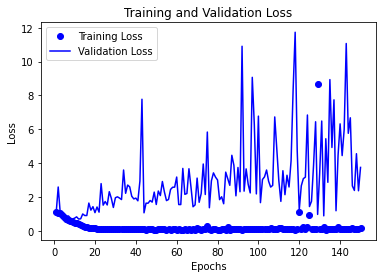

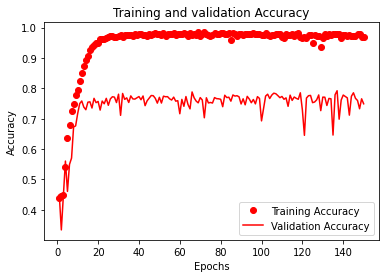

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'ro', label = 'Training Accuracy' )
plt.plot(epochs, val_acc_values, 'r', label = 'Validation Accuracy' )
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [ ]:
train_prob = model.evaluate(train_data, train_target)
print(train_prob)

y_prob = model.predict(test_data)
y_prob.round(2)

y_pred = np.argmax(y_prob, axis = 1)
print(test_data.shape)
print(y_pred.shape)
print(y_pred)

#print(y_train[:10])



506/506 [==============================] - 3s 6ms/step - loss: 0.8073 - accuracy: 0.9342
[0.8073384165763855, 0.93415766954422]
(3965, 48, 48, 1)
(3965,)
[0 0 0 ... 1 0 2]


In [ ]:
import csv

i = 0
with open('/content/gdrive/My Drive/Assignment2/esassefa_predictions.csv','w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(["Id","Category"])
  for i in range(len(y_pred)):
    writer.writerow([i,y_pred[i]])
    i = i+1
  



In [ ]:

from tensorflow.keras.models import load_model
saved_model = load_model('/content/gdrive/My Drive/Assignment2/best_model.h5')

train_acc = saved_model.evaluate(train_data, train_target, verbose=0)
print(train_acc)
y_acc = saved_model.predict(test_data)
y_acc.round(2)

y_prediction = np.argmax(y_acc, axis = 1)



[1.5528169870376587, 0.9569706320762634]


In [ ]:
i = 0
with open('/content/gdrive/My Drive/Assignment2/esassefa_bestmodel_predictions.csv','w', newline='') as bestmodel_csvfile:
  writer = csv.writer(bestmodel_csvfile)
  writer.writerow(["Id","Category"])
  for i in range(len(y_prediction)):
    writer.writerow([i,y_prediction[i]])
    i = i+1
  